# Astrometría: Práctico 1

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 18

In [7]:
#Se define el generador de congruencia lineal con parámetros arbitrarios 

def glc(n, x0, a=57, c=1, m=256):

    numeros_pp = []
    for i in range(n):
        x = (c + a*x0) % m
        numeros_pp.append(x/m)
        x0 = x

    return numeros_pp


In [8]:
#Se define un generador de congruencia lineal con variables estándar 

def generador_congruencia_lineal_enteros(n, x0, a=1664525, c=1013904223, m=2**32): 

    numeros_enteros = []
    for i in range(n):
        x = (c + a*x0) % m
        numeros_enteros.append(x) #guarda cada numero en una lista
        x0 = x
    return numeros_enteros

def generador_congruencia_lineal(n, x0, a=1664525, c=1013904223, m=2**32):
    return np.array(generador_congruencia_lineal_enteros(n,x0,a,c,m))/m #objeto de python con valores y metodos asociados


In [9]:
#Se generan números aleatorios entre 0 y 1 con los parámetros dados en el práctico

numeros_pp = glc(257,10)
print(numeros_pp)


[0.23046875, 0.140625, 0.01953125, 0.1171875, 0.68359375, 0.96875, 0.22265625, 0.6953125, 0.63671875, 0.296875, 0.92578125, 0.7734375, 0.08984375, 0.125, 0.12890625, 0.3515625, 0.04296875, 0.453125, 0.83203125, 0.4296875, 0.49609375, 0.28125, 0.03515625, 0.0078125, 0.44921875, 0.609375, 0.73828125, 0.0859375, 0.90234375, 0.4375, 0.94140625, 0.6640625, 0.85546875, 0.765625, 0.64453125, 0.7421875, 0.30859375, 0.59375, 0.84765625, 0.3203125, 0.26171875, 0.921875, 0.55078125, 0.3984375, 0.71484375, 0.75, 0.75390625, 0.9765625, 0.66796875, 0.078125, 0.45703125, 0.0546875, 0.12109375, 0.90625, 0.66015625, 0.6328125, 0.07421875, 0.234375, 0.36328125, 0.7109375, 0.52734375, 0.0625, 0.56640625, 0.2890625, 0.48046875, 0.390625, 0.26953125, 0.3671875, 0.93359375, 0.21875, 0.47265625, 0.9453125, 0.88671875, 0.546875, 0.17578125, 0.0234375, 0.33984375, 0.375, 0.37890625, 0.6015625, 0.29296875, 0.703125, 0.08203125, 0.6796875, 0.74609375, 0.53125, 0.28515625, 0.2578125, 0.69921875, 0.859375, 0.98828

In [10]:
#Determinación de período

semilla=10
numeros_pp = glc(257, semilla)

for i,n in enumerate(numeros_pp):
    if n == semilla/256:
        print("Período:",i+1)
        break


Período: 256


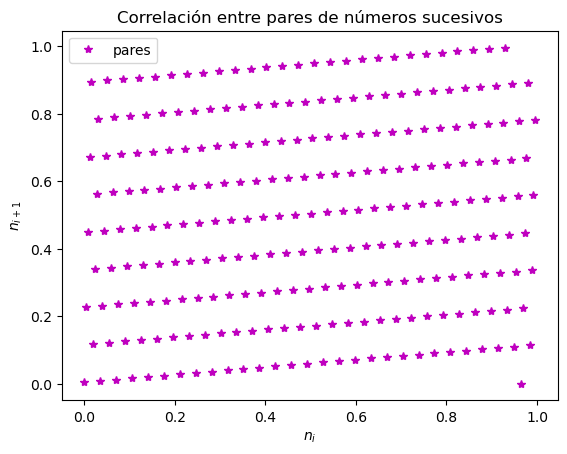

In [11]:
#Graficamos la correlación entre pares de números sucesivos

x = numeros_pp[:-1] #todos los elementos excepto el último
y = numeros_pp[1:] #todos los elementos excepto el primero
plt.plot(x,y,"m*",label="pares")
plt.xlabel(r"$n_{i}$")
plt.ylabel(r"$n_{i+1}$")
plt.title("Correlación entre pares de números sucesivos")
plt.savefig("pares_practico.pdf")
plt.legend()


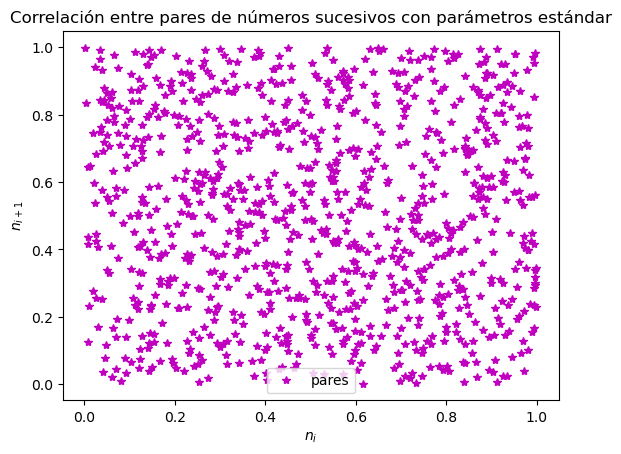

In [12]:

#Se genera el mismo gráfico pero con buenos parámetros

numeros = generador_congruencia_lineal(1000, 42)
x = numeros[:-1]
y = numeros[1:]
plt.plot(x,y,"m*",label="pares")
plt.xlabel(r"$n_{i}$")
plt.ylabel(r"$n_{i+1}$")
plt.title("Correlación entre pares de números sucesivos con parámetros estándar")
plt.savefig("pares_estandar.pdf")
plt.legend()

In [13]:
#Momentos de orden k

def calcular_momentos(numeros, k):
    momentos = [np.mean((np.array(numeros)) ** i) for i in k]
    return momentos

# Parámetros
k = [1,3,7]
momentos = calcular_momentos(generador_congruencia_lineal(10,42), k)
print(f'Momentos de orden k = {k} para n = 10: {momentos}')

# Parámetros
k = [1,3,7]
momentos = calcular_momentos(generador_congruencia_lineal(100,42), k)
print(f'Momentos de orden k = {k} para n = 100: {momentos}')

# Parámetros
k = [1,3,7]
momentos = calcular_momentos(generador_congruencia_lineal(1000,42), k)
print(f'Momentos de orden k = {k} para n = 1000: {momentos}')




Momentos de orden k = [1, 3, 7] para n = 10: [np.float64(0.39758190570864826), np.float64(0.20155232619701974), np.float64(0.1378118639983116)]
Momentos de orden k = [1, 3, 7] para n = 100: [np.float64(0.5064797649299726), np.float64(0.26801841295115614), np.float64(0.14363692238754988)]
Momentos de orden k = [1, 3, 7] para n = 1000: [np.float64(0.5113051657257601), np.float64(0.2582918809726271), np.float64(0.1320245353280023)]


/tmp/ipykernel_7800/1894874286.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend( loc="best")


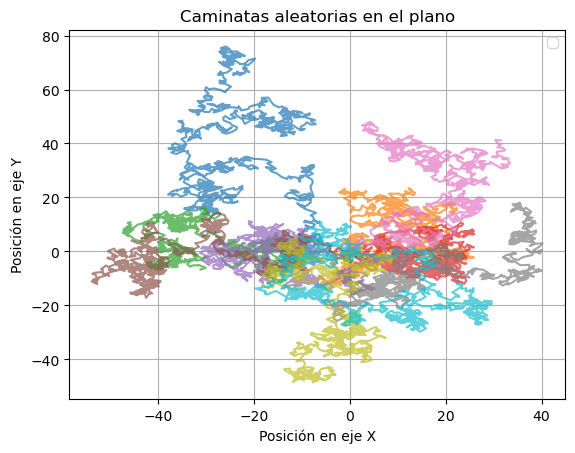

In [14]:
#Se grafican caminatas aleatorias en el rango en el plano xy 

N_caminatas = 10
N_pasos = 1000

x = np.zeros((N_caminatas, N_pasos))
y = np.zeros((N_caminatas, N_pasos))
for i in range(N_caminatas):
    for j in range(1, N_pasos):
        salto = np.random.rand()*2*np.sqrt(2) - np.sqrt(2)
        x[i,j] = x[i,j-1] + salto
        salto = np.random.rand()*2*np.sqrt(2) - np.sqrt(2)
        y[i,j] = y[i,j-1] + salto


for i in range(N_caminatas):
    plt.plot(x[i], y[i], alpha=0.7)

plt.title("Caminatas aleatorias en el plano")
plt.xlabel("Posición en eje X")
plt.ylabel("Posición en eje Y")
plt.grid(True)
plt.legend( loc="best")
plt.savefig("caminatas xy.pdf")
plt.show()

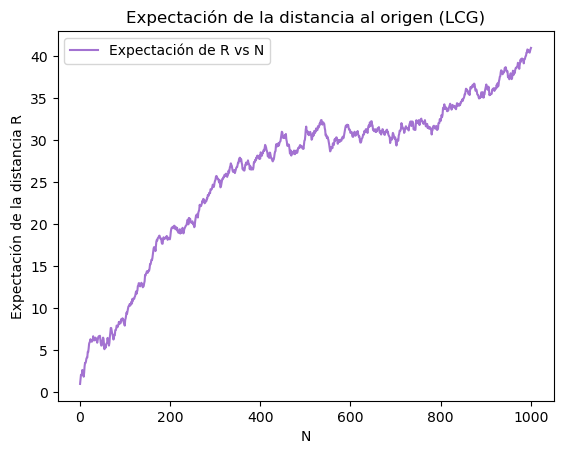

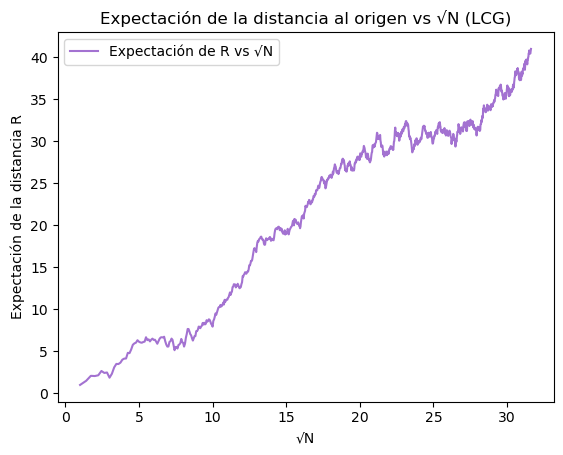

In [15]:
#Se grafica el valor de expectación de la distancia al origen R como función del paso N y sqrt(N)

N = 1000   # pasos
K = 10     # caminatas
limite = np.sqrt(2) #define el rango máximo de los pasos

R_caminatas = np.zeros((K, N)) #Crea una matriz de ceros con dimensiones (K, N).

for k in range(K):
    semilla = 42 + k #asigna una semilla distinta para cada caminata
    numeros = generador_congruencia_lineal(2*N, semilla)  #genera 2N números aleatorios en [0,1]
    dx = 2*limite*numeros[0::2] - limite  #toma los números en índices 0,2,4,…, (x)
    dy = 2*limite*numeros[1::2] - limite  #toma los números en índices 1,3,5,…, (y)

    x, y = 0, 0 #Inicializa la posición inicial de la caminata en el origen (0,0).
    for i in range(N):
        x += dx[i] #actualiza la coordenada x sumando el paso dx del índice i.
        y += dy[i] #actualiza la coordenada y sumando el paso dy del índice i.
        R_caminatas[k, i] = np.sqrt(x**2 + y**2) #calcula distancia a origen y la guarda en la matriz

# valor esperado sobre K caminatas
R_promedio = np.mean(R_caminatas, axis=0)

# plot como función de N
plt.figure()
plt.plot(range(1, N+1), R_promedio, color='#A372D1', label='Expectación de R vs N')
plt.xlabel('N')
plt.ylabel('Expectación de la distancia R')
plt.title('Expectación de la distancia al origen (LCG)')
plt.legend()
plt.savefig("caminatas_N.pdf")
plt.show()

# plot como función de sqrt(N)
plt.figure()
plt.plot(np.sqrt(np.arange(1, N+1)), R_promedio,  color="#A372D1", label='Expectación de R vs √N')
plt.xlabel('√N')
plt.ylabel("Expectación de la distancia R")
plt.title('Expectación de la distancia al origen vs √N (LCG)')
plt.legend()
plt.savefig("caminatas_sqrt(N).pdf")
plt.show()
# %%


## Ejercicio 19

In [16]:
#Se define el generador de Fibonacci a partir de una semilla de k números generados a partir del gcl

def generador_fibonacci_enteros(n , x0, j=24, k=55, m=2**32):
    numeros = generador_congruencia_lineal_enteros(k, x0, a=57, c=1)
    for i in range(k, k+n): #toma de k hasta k+n-1, el ultimo no lo cuenta
        numeros.append ((numeros[i-j]+numeros[i-k]) % m) #estamos generando el numero k-esimo
    return numeros[k:] #te devuelve de k en adelante

def generador_fibonacci(n, x0, j =24, k=55, m=2**32):
    return np.array(generador_fibonacci_enteros(n,x0,j,k,m))/m


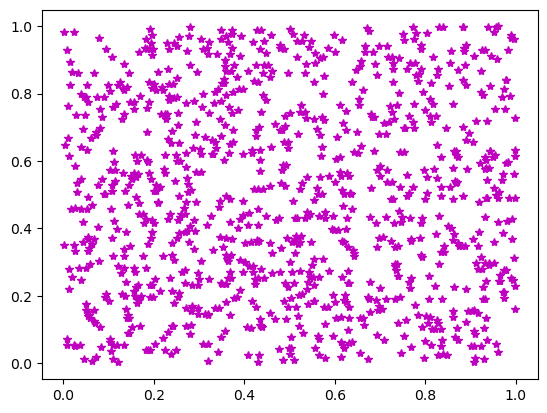

In [17]:
#Grafico los pares de números sucesivos
def ej19f1(): 
    x= generador_fibonacci(1000,142)
    _x=x[1:]
    _y =x[:-1]
    plt.plot(_x,_y,"m*")
    plt.savefig("fibonacci_pares.pdf")
ej19f1()

In [18]:
#Se calcula la media y varianza muestral

n = 10000
x0 = 111  #semilla inicial
numeros_fibo = generador_fibonacci(n, x0)


media_fibo = np.mean(numeros_fibo)
var_fibo = np.var(numeros_fibo, ddof=1)  # varianza muestral

print(f"Media muestral   = {media_fibo:.5f} (teórica = 0.5)")
print(f"Varianza muestral = {var_fibo:.5f} (teórica = 0.08333)")

Media muestral   = 0.49916 (teórica = 0.5)
Varianza muestral = 0.08229 (teórica = 0.08333)


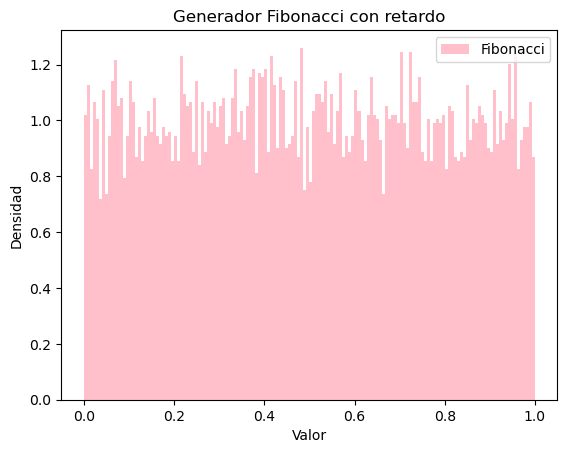

In [19]:
#Histograma de la densidad de números generados

plt.hist(numeros_fibo, bins=150, density=True, color="pink", label="Fibonacci")
plt.title("Generador Fibonacci con retardo")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.savefig("fibonacci_histograma.pdf")
plt.show()

In [20]:
#Se calcula la media y varianza para los números generados con el programa numpy.random

numeros_numpy = np.random.random(n)
media_numpy = np.mean(numeros_numpy)
var_numpy = np.var(numeros_numpy, ddof=1)


print("\nNumPy random.random():")
print(f"Media muestral   = {media_numpy:.5f} (teórica = 0.5)")
print(f"Varianza muestral = {var_numpy:.5f} (teórica = 0.08333)")


NumPy random.random():
Media muestral   = 0.50091 (teórica = 0.5)
Varianza muestral = 0.08362 (teórica = 0.08333)


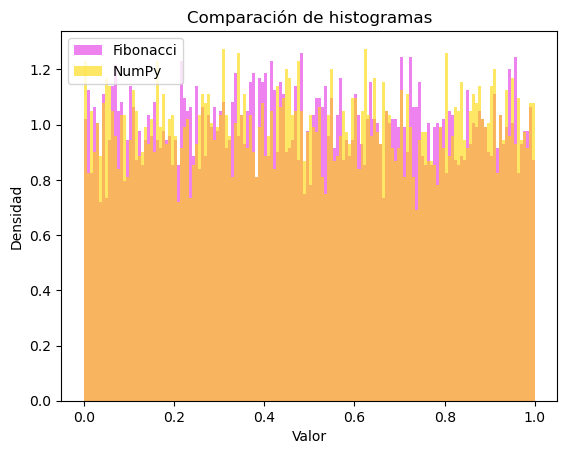

In [21]:
#Histograma de comparación entre Fibonacci y numpy.random

plt.hist(numeros_fibo, bins=150, density=True, color="violet", label="Fibonacci")
plt.hist(numeros_numpy, bins=150, density=True, color="gold", alpha=0.6, label="NumPy")
plt.title("Comparación de histogramas")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.savefig("fibonacci_comparación.pdf")
plt.show()

## Ejercicio 20

In [22]:
#Definimos el factor de correlación de Pearson

def pearson_correlation (x,y): # función que toma dos arrays de igual longitud
# Verificar que tienen la misma longitud
    if len(x) != len(y):
        raise ValueError ("Los arrays deben tener la misma longitud ")

    n = len(x) #número de observaciones

    # Calcular medias
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calcular numerador y denominador
    numerator = np.sum((x-mean_x)*(y-mean_y))
    denominator = np.sqrt(np.sum((x-mean_x) **2) * np.sum(( y-mean_y)**2))

    # Evitar division por cero
    if denominator == 0:
        return 0

    return numerator/denominator

In [23]:
#Correlacionamos cada número con el número que aparece k pasos después

numeros_gcl = generador_congruencia_lineal(1000, 42)  
retardos = [1, 2, 3, 5, 7, 10]

print("Coeficiente de Pearson para retardos:")
for k in retardos:
    r = pearson_correlation(numeros_gcl[:-k], numeros_gcl[k:]) #toma todos los elementos menos los últimos/primeros k.
    print(f"Retardo {k}: r = {r:.4f}") #reemplaza con el valor de r y lo formatea a 4 decimales.


numeros_fib = generador_fibonacci(1000, 42)

print("\nCoeficiente de Pearson para Fibonacci:")
for k in retardos:
    r = pearson_correlation(numeros_fib[:-k], numeros_fib[k:])
    print(f"Retardo {k}: r = {r:.4f}")


Coeficiente de Pearson para retardos:
Retardo 1: r = -0.0362
Retardo 2: r = 0.0283
Retardo 3: r = -0.0667
Retardo 5: r = 0.0065
Retardo 7: r = -0.0003
Retardo 10: r = -0.0100

Coeficiente de Pearson para Fibonacci:
Retardo 1: r = -0.0170
Retardo 2: r = 0.0274
Retardo 3: r = -0.0126
Retardo 5: r = -0.0293
Retardo 7: r = -0.0025
Retardo 10: r = -0.0125


## Ejercicio 21
Hay tres puertas.
    2/3 de probabilidad de elegir cabra
    1/3 de probabilidad de elegir auto

Si abren una puerta donde hay una cabra veamos que pasa:

    Si inicialmente elegiste cabra (2/3 de prob) y cambias ganas
    Si inicialmente elegiste cabra (2/3 de prob) y no cambias perdes
    Si incialmente elegiste auto (1/3 de prob) y cambias perdes
    Si inciailmente elegiste auto (1/3 de prob) y no cambias ganas

Conclusión: Entre las dos opciones de ganar, hay mas chances si cambias de elección.

## Ejercicio 22

In [24]:
#Gneramos distintos tipos de galaxias a partir del generador de FIbonacci

def generador_galaxias(n):
    galaxias = []

    X = generador_fibonacci(n,142)
    for x in X:
        if (0 <= x) and (x < 0.4):
            galaxias.append("eliptica")
        elif (0.4 <= x) and (x < 0.7):
            galaxias.append("espiral")
        elif (0.7 <= x) and (x < 0.9):
            galaxias.append("enana")
        else:
            galaxias.append("irregular")
    return galaxias

g = generador_galaxias(20)
print(g)

['espiral', 'eliptica', 'espiral', 'eliptica', 'enana', 'enana', 'irregular', 'enana', 'eliptica', 'eliptica', 'espiral', 'enana', 'enana', 'eliptica', 'espiral', 'eliptica', 'eliptica', 'irregular', 'eliptica', 'eliptica']


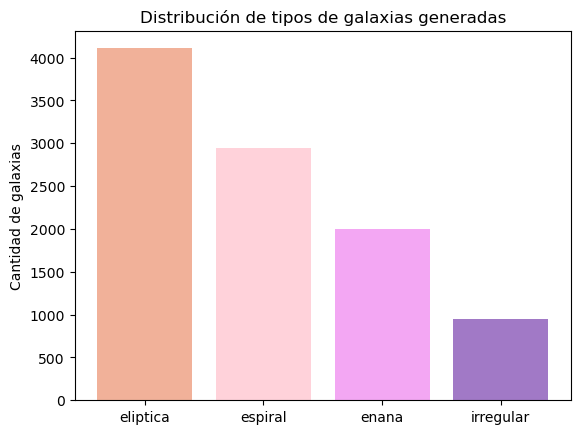

In [ ]:
#Generamos un histograma con la distribución

from collections import Counter

galaxias = generador_galaxias(10000)

conteo = Counter(galaxias)

tipos = ["eliptica", "espiral", "enana", "irregular"]
frecuencias = [conteo[tipo] for tipo in tipos]

plt.bar(tipos, frecuencias, color=["#EC906E", "pink", "violet", "#7A41AF"], alpha=0.7)
plt.ylabel("Cantidad de galaxias")
plt.title("Distribución de tipos de galaxias generadas")
plt.savefig("galaxias.pdf")
plt.show()

## Ejercicio 23

In [ ]:
#Obtenemos la distribución de probabilidad de la variable aleatoria

def LCG(n, x0, a=1664525, c=1013904223, M=2**32):
    numeros = []
    x = x0
    for _ in range(n):
        x = (a*x + c) % M
        numeros.append(x / M)  # escala a [0,1]
    return numeros


suma_valores = np.arange(2, 13)
frecuencias = [1,2,3,4,5,6,5,4,3,2,1]
prob_teorica = np.array(frecuencias) / 36

print("Suma:", suma_valores)
print("Probabilidad teórica:", [f"{p:.3f}" for p in prob_teorica])

Suma: [ 2  3  4  5  6  7  8  9 10 11 12]
Probabilidad teórica: ['0.028', '0.056', '0.083', '0.111', '0.139', '0.167', '0.139', '0.111', '0.083', '0.056', '0.028']


Empírica desde PDF (LCG): ['0.028', '0.056', '0.085', '0.107', '0.136', '0.162', '0.143', '0.110', '0.087', '0.056', '0.031']
Empírica simulando dados (LCG): ['0.027', '0.057', '0.081', '0.110', '0.138', '0.162', '0.140', '0.109', '0.088', '0.058', '0.031']


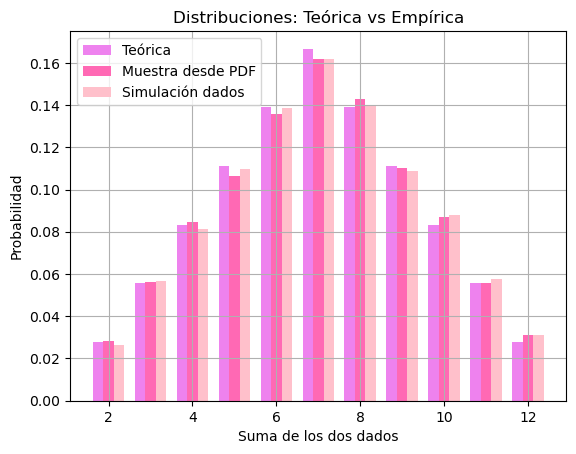

In [31]:
#Se genera un histograma de comparacióm de la distribución empírica resultante, la distribución de probabilidad empírica de la suma y de la distribución teórica.

def muestra_teorica(N, x0):
    rand = LCG(N, x0) 
    muestras = []
    for r in rand:
        acumulada = np.cumsum(prob_teorica) #calcula la probabilidad acumulada
        for i, p in enumerate(acumulada):
            if r <= p: #veo cada numero en donde caen en la acumulada
                muestras.append(suma_valores[i]) # guardo el valor de la suma correspondiente
                break
    return np.array(muestras)

N = 10000
x0 = 42

muestras_teoricas = muestra_teorica(N, x0)
frec_emp_c = [np.sum(muestras_teoricas==v)/N for v in suma_valores]

print("Empírica desde PDF (LCG):", [f"{p:.3f}" for p in frec_emp_c])

rand1 = LCG(N, x0)
rand2 = LCG(N, x0+1)   #semilla distinta para el segundo dado

dado1 = [int(r*6)+1 for r in rand1]  #escala a [1..6]
dado2 = [int(r*6)+1 for r in rand2]

suma = np.array(dado1) + np.array(dado2)
frec_emp_d = [np.sum(suma==v)/N for v in suma_valores]
print("Empírica simulando dados (LCG):", [f"{p:.3f}" for p in frec_emp_d])

#%%
plt.bar(suma_valores-0.25, prob_teorica, width=0.25, label="Teórica", color="violet")
plt.bar(suma_valores, frec_emp_c, width=0.25, label="Muestra desde PDF", color="hotpink")
plt.bar(suma_valores+0.25, frec_emp_d, width=0.25, label="Simulación dados", color="pink")
plt.xlabel("Suma de los dos dados")
plt.ylabel("Probabilidad")
plt.title("Distribuciones: Teórica vs Empírica")
plt.legend()
plt.grid(True)
plt.savefig("dados.pdf")
plt.show()